
# Project: No show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

With the given characteristics like gender, age, scholarship and health profile of every patient such as hypertension, alcoholism, diabetes, handicap.

In the following sections we will investigate and clean the dataset to answer some questions:

- What is the percentage of patients showed to their appointment?
- How is the distribution of patient ages for showed and not showed appointments?
- How the notification by SMS affect the response of patients to appointments?
- The distribution of males and females between showed and not showed patients.
- Scholarship and patients relations.
- How waiting time for appointment affect the patients?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Rename columns with lower case and correct mistyping.
- Rename No-show to show and replace (Yes& No) with (0& 1).


In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show'],
      dtype='object')

In [5]:
df['show'].replace('No', 1, inplace=True)
df['show'].replace('Yes', 0, inplace=True)

In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  show             110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


- The dataset does not contain any nan values.
- No duplicated rows in the dataset.
- The patientId Dtype should be integer.
- ScheduledDay and AppointmentDay Dtypes should be converted to datetime to be handled.
- Add new column for the no. of waiting days for appointment.
- More investigation should be done to check the dataset.

In [10]:
# convert patient_id from string into integer
df['patient_id'] = df['patient_id'].astype('int64')

In [11]:
# convert scheduled_day and appointment_day to datetime object
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

In [12]:
# calculate waiting_day for each appointment
df['waiting_days'] = (df['appointment_day'] - df['scheduled_day'])

In [13]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   patient_id       110527 non-null  int64          
 1   appointment_id   110527 non-null  int64          
 2   gender           110527 non-null  object         
 3   scheduled_day    110527 non-null  datetime64[ns] 
 4   appointment_day  110527 non-null  datetime64[ns] 
 5   age              110527 non-null  int64          
 6   neighbourhood    110527 non-null  object         
 7   scholarship      110527 non-null  int64          
 8   hypertension     110527 non-null  int64          
 9   diabetes         110527 non-null  int64          
 10  alcoholism       110527 non-null  int64          
 11  handicap         110527 non-null  int64          
 12  sms_received     110527 non-null  int64          
 13  show             110527 non-null  int64          
 14  wait

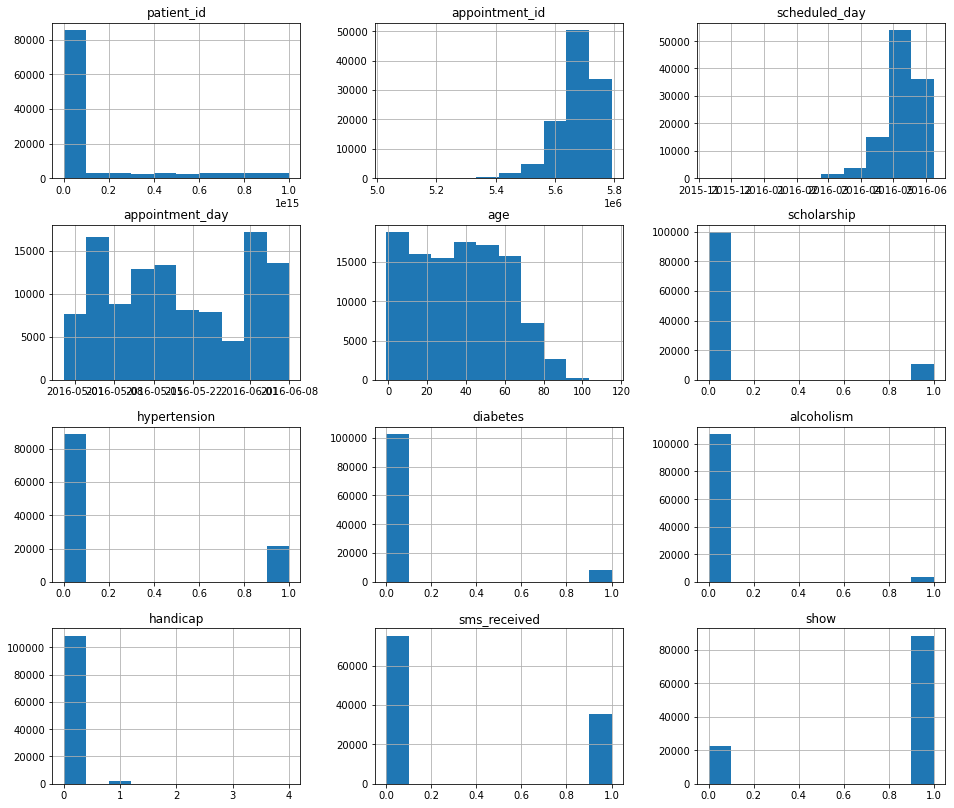

In [15]:
df.hist(figsize=(16,14));

In [16]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

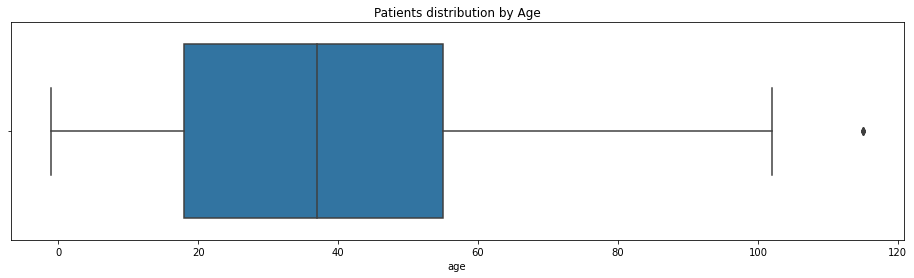

In [17]:
plt.figure(figsize=(16,4))
sns.boxplot(x=df.age)
plt.title('Patients distribution by Age');

- Min value equal to -1 is incorrect value so this row will be droped.
- Age equal to 115 is outlier so it will be droped.

In [18]:
df = df[df['age'] >= 0 ]
df = df[df['age'] <= 102 ]

In [19]:
df['age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: age, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   patient_id       110521 non-null  int64          
 1   appointment_id   110521 non-null  int64          
 2   gender           110521 non-null  object         
 3   scheduled_day    110521 non-null  datetime64[ns] 
 4   appointment_day  110521 non-null  datetime64[ns] 
 5   age              110521 non-null  int64          
 6   neighbourhood    110521 non-null  object         
 7   scholarship      110521 non-null  int64          
 8   hypertension     110521 non-null  int64          
 9   diabetes         110521 non-null  int64          
 10  alcoholism       110521 non-null  int64          
 11  handicap         110521 non-null  int64          
 12  sms_received     110521 non-null  int64          
 13  show             110521 non-null  int64          
 14  wait

In [21]:
df['appointment_day'].describe(datetime_is_numeric=True)

count                           110521
mean     2016-05-19 00:57:18.144786688
min                2016-04-29 00:00:00
25%                2016-05-09 00:00:00
50%                2016-05-18 00:00:00
75%                2016-05-31 00:00:00
max                2016-06-08 00:00:00
Name: appointment_day, dtype: object

In [22]:
df['scheduled_day'].describe(datetime_is_numeric=True)

count                           110521
mean     2016-05-08 20:32:44.672776960
min                2015-11-10 00:00:00
25%                2016-04-29 00:00:00
50%                2016-05-10 00:00:00
75%                2016-05-20 00:00:00
max                2016-06-08 00:00:00
Name: scheduled_day, dtype: object

In [23]:
df.gender.value_counts()

F    71834
M    38687
Name: gender, dtype: int64

In [24]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days


<a id='eda'></a>
## Exploratory Data Analysis


### What is the percentage of patients showed to their appointment?

In [25]:
showed = df['show'] == 1
not_showed = df['show'] == 0
df['showed'] = showed
df['not_showed'] = not_showed

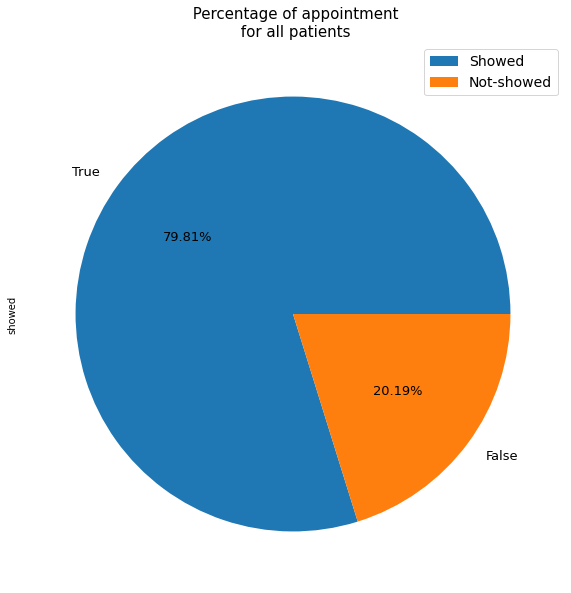

In [26]:
df['showed'].value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize=13);
plt.title(' Percentage of appointment\n for all patients', fontsize=15);
plt.legend({'Showed':True, 'Not-showed': False}, fontsize=14);

- 79.81% of patients showed to thier appointments.
- 20.19% of patients did not show to thier appointments.

### How is the distribution of patient ages for showed and not showed appointments?

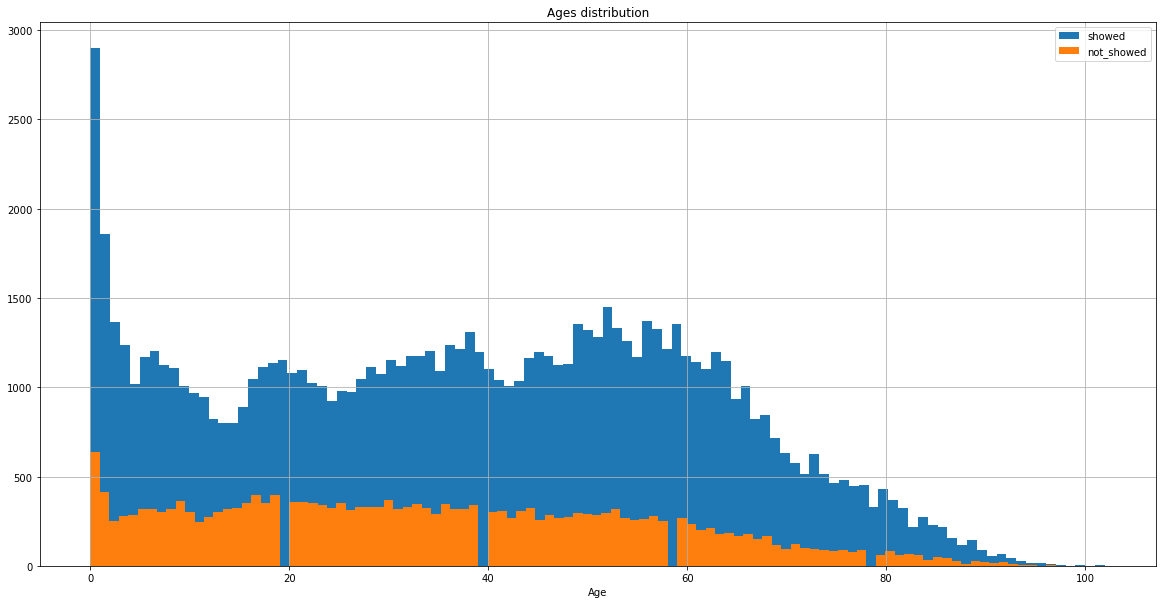

In [27]:
df.age[showed].hist(alpha=1, bins=103, figsize=(20,10), label='showed')
df.age[not_showed].hist(alpha=1, bins=103, label='not_showed')
plt.xlabel('Age')
plt.title('Ages distribution')
plt.legend();

- High number of patients of age less than 1 year and approximatly uniform distribution til age of 60 years then skew to the right.



### How the notification by SMS affect the response of patients to appointments?

In [28]:
notified = df['sms_received'] == 1
not_notified = df['sms_received'] == 0
df['notified'] = notified
df['not_notified'] = not_notified

In [29]:
df.notified.value_counts()

False    75040
True     35481
Name: notified, dtype: int64

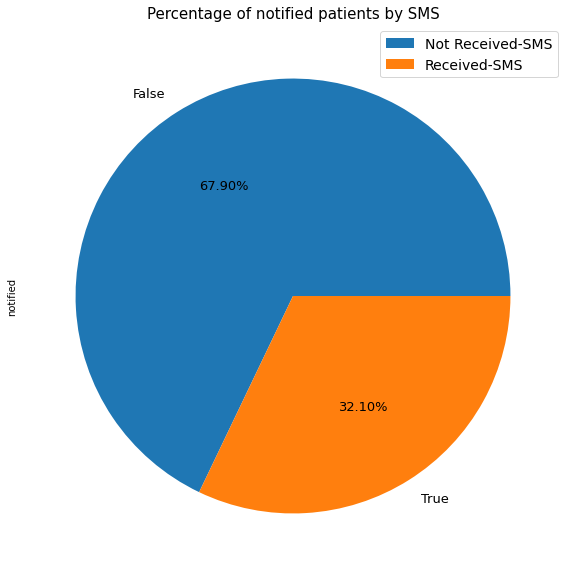

In [30]:
df.notified.value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', fontsize=13)
plt.title('Percentage of notified patients by SMS', fontsize=15);
plt.legend({'Not Received-SMS':True, 'Received-SMS': False}, fontsize=14);

- 67.90% of patients did not receive notification by SMS.
- 32.10% of patients received notification by SMS.

In [31]:
df.showed[notified].value_counts()

True     25697
False     9784
Name: showed, dtype: int64

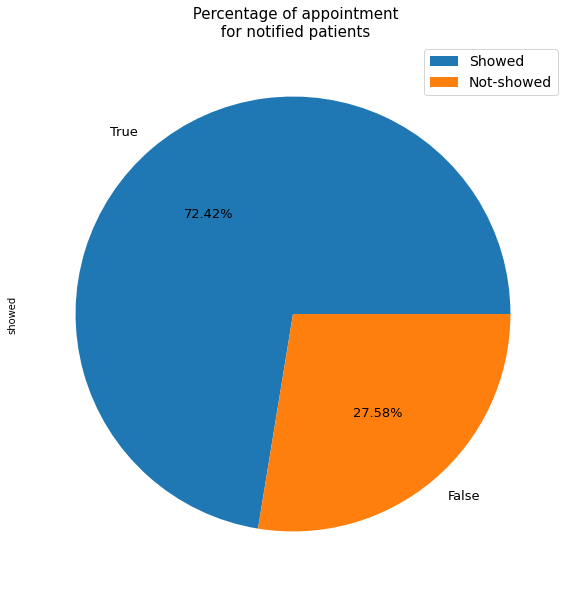

In [32]:
df.showed[notified].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', fontsize=13)
plt.title(' Percentage of appointment\n for notified patients', fontsize=15);
plt.legend({'Showed':True, 'Not-showed': False}, fontsize=14);

- 72.42% of notified patients showed to their appointment.
- 27.58% of notified patients did not show to their appointment.

### The distribution of males and females between showed and not showed patients.

In [33]:
df.gender.value_counts()

F    71834
M    38687
Name: gender, dtype: int64

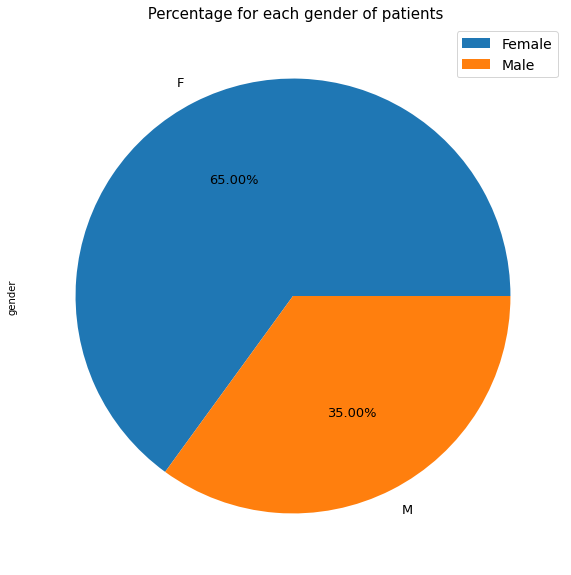

In [34]:
df.gender.value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', fontsize=13)
plt.title(' Percentage for each gender of patients', fontsize=15);
plt.legend({'Female':'F', 'Male':'M'}, fontsize=14);

- 65.00% of patients are Females.
- 35.00% of patients are Males.

The percentage of females is higher than males that seems to be a health problems in females in this population or may be there are alot of pregnant females in the dataset but it is not clear.

In [35]:
df.groupby('gender').showed.value_counts()

gender  showed
F       True      57243
        False     14591
M       True      30962
        False      7725
Name: showed, dtype: int64

In [36]:
male = df['gender'] == 'M'

In [37]:
df.showed[male].value_counts()

True     30962
False     7725
Name: showed, dtype: int64

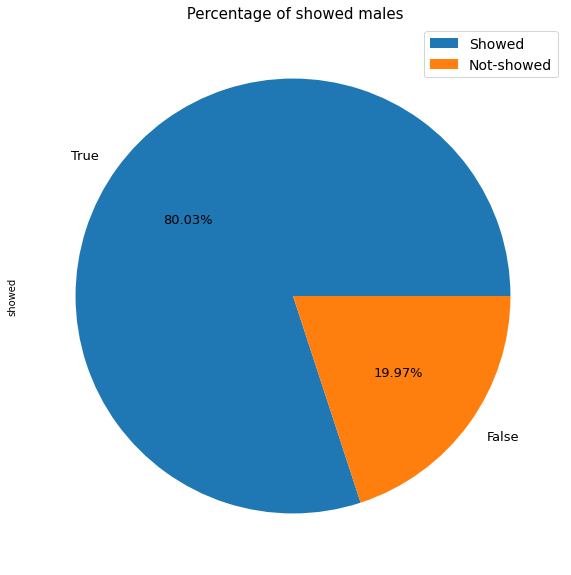

In [38]:
df.showed[male].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', fontsize=13)
plt.title(' Percentage of showed males', fontsize=15);
plt.legend({'Showed':True, 'Not-showed': False}, fontsize=14);

- 80% of males showed to their appointments.
- 20% of males did not show to their appointments.

In [39]:
female = df['gender'] == 'F'

In [40]:
df.showed[female].value_counts()

True     57243
False    14591
Name: showed, dtype: int64

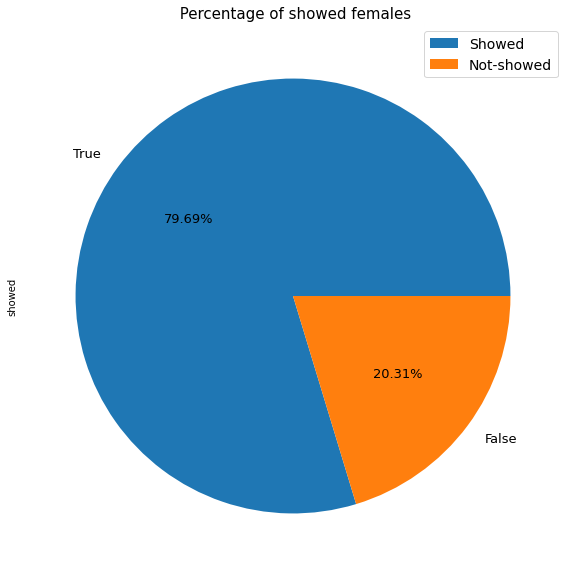

In [41]:
df.showed[female].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', fontsize=13)
plt.title(' Percentage of showed females', fontsize=15);
plt.legend({'Showed':True, 'Not-showed': False}, fontsize=14);

- 80% of females showed to their appointments.
- 20% of females did not show to their appointments.

The percentage of 80% of show up is consistent with the previous findings in the dataset. 

### Scholarship and patients relations.

In [42]:
df.scholarship.value_counts()

0    99660
1    10861
Name: scholarship, dtype: int64

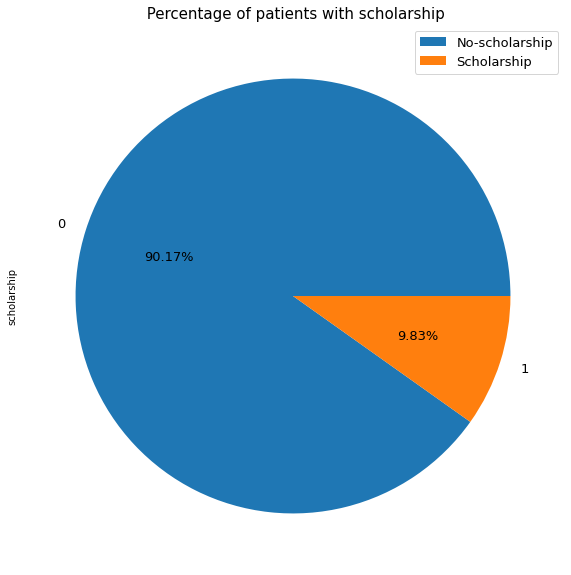

In [43]:
df.scholarship.value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', fontsize=13)
plt.title(' Percentage of patients with scholarship', fontsize=15);
plt.legend({'No-scholarship':0, 'Scholarship':1}, fontsize=13);

- 90.17% of patients do not have scholarship.
- 9.83% of patients have scholarship. 

The percentage of patients with scholarship is very low and this means that the dataset does not cover sufficient data about poor people who registered in the brazilian program of health.

In [44]:
df.groupby('scholarship').showed.value_counts()

scholarship  showed
0            True      79922
             False     19738
1            True       8283
             False      2578
Name: showed, dtype: int64

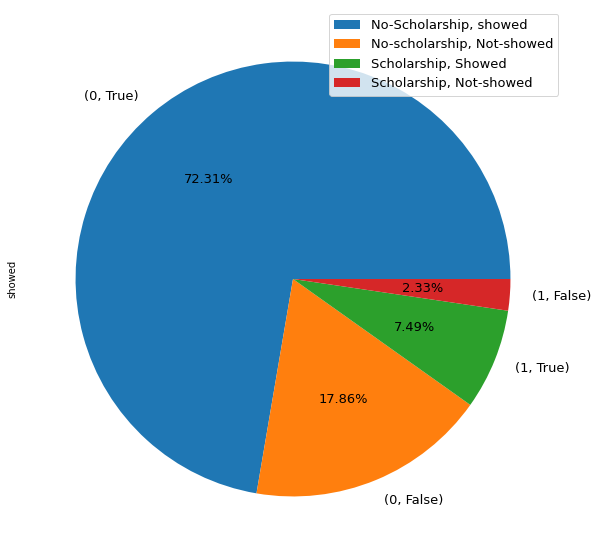

In [45]:
df.groupby(['scholarship']).showed.value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', fontsize=13);
plt.legend({'No-Scholarship, showed':1, 'No-scholarship, Not-showed':0, 'Scholarship, Showed':True, 'Scholarship, Not-showed':False}, fontsize=13);

### How waiting time for appointment affect the patients?

In [46]:
df['waiting_days'] = df['appointment_day'] - df['scheduled_day']
df['waiting_days'] = df['waiting_days'].dt.days
days = df.drop(df.index[df['waiting_days'] < 0])
days = days[['show', 'waiting_days']].groupby('waiting_days').count()

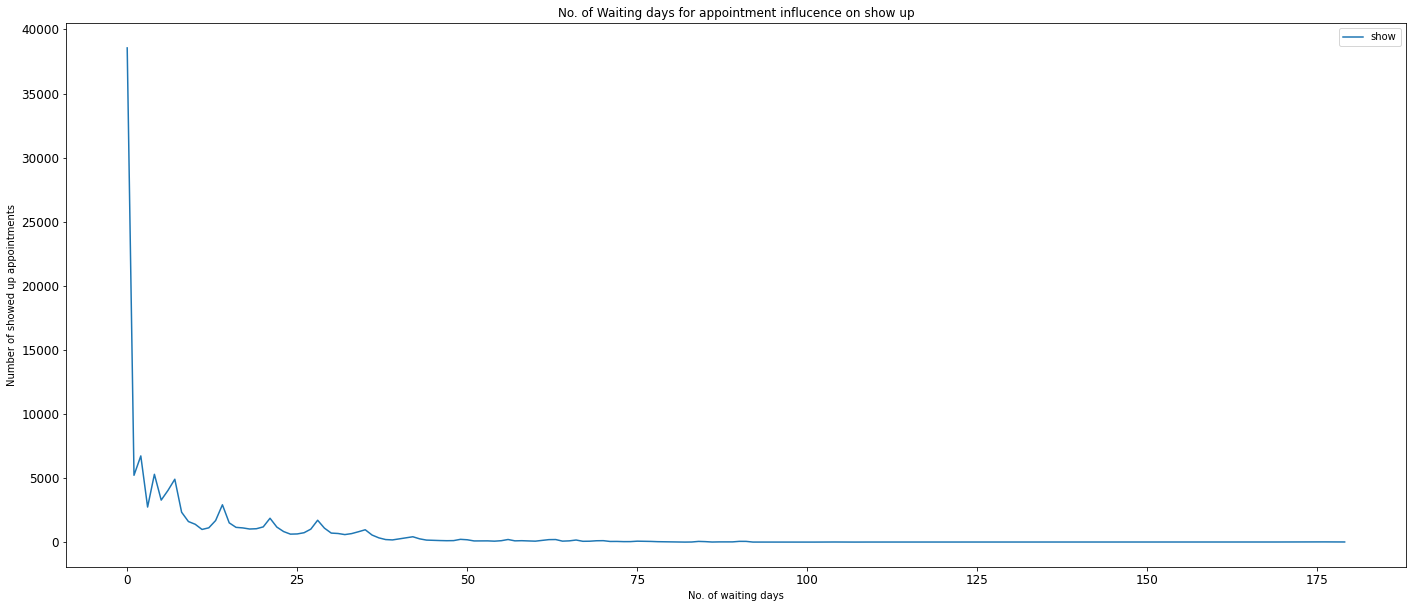

In [47]:
days.plot(kind='line', figsize=(24,10), fontsize=12)
plt.title("No. of Waiting days for appointment influcence on show up")
plt.xlabel('No. of waiting days')
plt.ylabel('Number of showed up appointments');

- For low number of waiting days the number of showed up patients is very high.

<a id='conclusions'></a>
## Conclusions

For the analyzed parameters and thier effect on the patients show up to their appointments we have the following findings:
- Sending SMS has weak effect on patients show up to their appointment.
- Males and females have same percentage of show up to appointments although males are less than females in this sample of data.
- The number of patients having scholarship is very low in the dataset and can not be considered a powerfull factor.
- There are other factors such as waiting days for appointment has great effect, for low number of waiting days high percentage of patients showed up to their appointments.

### Limitations

- There are only 10% of patients have scholarship and already registered in the program Bolsa Familia https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia so the data set does not cover good population of poor Brazilian families and most of the previous results are only give indications for medium and high class people.
- The timeframe of the dataset is too limited as the available data for appointment days is only for less than two months.